# vivarium-ecoli

Wiring diagraph of the [Covert lab's Whole-Cell E. coli model][https://github.com/CovertLab/vivarium-ecoli]

In [17]:
from bigraph_viz import plot_bigraph
from bigraph_viz.dict_utils import replace_regex_recursive

save_files = False

plot_settings = {
    'dpi': '70',
    'port_label_size': '12pt',
    'node_label_size': '20pt',
    'process_label_size': '20pt',
    'label_margin': '0.1',
    'undirected_edges': True,
}
if save_files:
    plot_settings['out_dir'] = 'out'
    plot_settings['file_format'] = 'pdf'
    plot_settings['dpi'] = '4000'


## E. coli core model

In [18]:
ecoli = { 
    'chromosome<br/>structure': {
        '_type': 'process',
        'inputs': {
            'fragmentBases': ['bulk<br/>molecules',],
            'molecules': ['bulk<br/>molecules',],
            'active<br/>tfs': ['bulk<br/>molecules',],
            'subunits': ['bulk<br/>molecules',],
            'amino<br/>acids': ['bulk<br/>molecules',],
            'active<br/>replisomes': ['unique<br/>molecules', 'active<br/>replisome'],
            'oriCs': ['unique<br/>molecules', 'oriC'],
            'chromosome<br/>domains': ['unique<br/>molecules', 'chromosome<br/>domain'],
            'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
            'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
            'promoters': ['unique<br/>molecules', 'promoter'],
            'DnaA<br/>boxes': ['unique<br/>molecules', 'DnaA<br/>box']
        }
    },
    'metabolism': {
        '_type': 'process',
        'inputs': {
            'metabolites': ['bulk<br/>molecules',],
            'catalysts': ['bulk<br/>molecules',],
            'kinetics<br/>enzymes': ['bulk<br/>molecules',],
            'kinetics<br/>substrates': ['bulk<br/>molecules',],
            'amino<br/>acids': ['bulk<br/>molecules',],
            'environment': ['environment',],
            # 'polypeptide<br/>elongation': ['process<br/>state', 'polypeptide<br/>elongation'],
            'amino<br/>acids<br/>total': ['bulk<br/>molecules',]
        }
    },
    'tf<br/>binding': {
         '_type': 'process',
        'inputs': {
            'promoters': ['unique<br/>molecules', 'promoter'],
            'active<br/>tfs': ['bulk<br/>molecules',],
            'active<br/>tfs<br/>total': ['bulk<br/>molecules',],
            'inactive<br/>tfs<br/>total': ['bulk<br/>molecules',],
        }
    },
    'transcript<br/>initiation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
            'promoters': ['unique<br/>molecules', 'promoter'],
            'molecules': ['bulk<br/>molecules',],
        }
    },
    'transcript<br/>elongation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
            'molecules': ['bulk<br/>molecules',],
            'bulk<br/>RNAs': ['bulk<br/>molecules',],
            'ntps': ['bulk<br/>molecules',],
        }
    },
    'rna<br/>degradation': {
        '_type': 'process',
        'inputs': {
            'charged<br/>trna': ['bulk<br/>molecules',],
            'bulk<br/>RNAs': ['bulk<br/>molecules',],
            'nmps': ['bulk<br/>molecules',],
            'fragmentMetabolites': ['bulk<br/>molecules',],
            'fragmentBases': ['bulk<br/>molecules',],
            'endoRnases': ['bulk<br/>molecules',],
            'exoRnases': ['bulk<br/>molecules',],
            'subunits': ['bulk<br/>molecules',],
            'molecules': ['bulk<br/>molecules',],
            'RNAs': ['unique<br/>molecules', 'RNA'],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
        }
    },
    'polypeptide<br/>initiation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
            'RNA': ['unique<br/>molecules', 'RNA'],
            'subunits': ['bulk<br/>molecules',]
        }
    },
    'polypeptide<br/>elongation': {
        '_type': 'process',
        'inputs': {
            'environment': ['environment',],
            'active<br/>ribosome': ['unique<br/>molecules', 'active<br/>ribosome'],
            'molecules': ['bulk<br/>molecules',],
            'monomers': ['bulk<br/>molecules',],
            'amino<br/>acids': ['bulk<br/>molecules',],
            'ppgpp<br/>reaction<br/>metabolites': ['bulk<br/>molecules',],
            'uncharged<br/>trna': ['bulk<br/>molecules',],
            'charged<br/>trna': ['bulk<br/>molecules',],
            'charging<br/>molecules': ['bulk<br/>molecules',],
            'synthetases': ['bulk<br/>molecules',],
            'subunits': ['bulk<br/>molecules',],
            # 'polypeptide<br/>elongation': ['process<br/>state', 'polypeptide<br/>elongation'],
            'molecules<br/>total': ['bulk<br/>molecules',],
            'amino<br/>acids<br/>total': ['bulk<br/>molecules',],
            'charged<br/>trna<br/>total': ['bulk<br/>molecules',],
            'uncharged<br/>trna<br/>total': ['bulk<br/>molecules',]
        }
    },
    'complexation': {
        '_type': 'process',
        'inputs': {
            'molecules': ['bulk<br/>molecules',], 
        }
    },
    'two<br/>component<br/>system': {
        '_type': 'process',
        'inputs': {
            'molecules': ['bulk<br/>molecules',]
        }
    },
    'equilibrium': {
        '_type': 'process',
        'inputs': {
            'molecules': ['bulk<br/>molecules',]
        }
    },
    'protein<br/>degradation': {
        '_type': 'process',
        'inputs': {
            'metabolites': ['bulk<br/>molecules',],
            'proteins': ['bulk<br/>molecules',]
        }
    },
    'chromosome<br/>replication': {
        '_type': 'process',
        'inputs': {
            'replisome<br/>trimers': ['bulk<br/>molecules',],
            'replisome<br/>monomers': ['bulk<br/>molecules',],
            'dntps': ['bulk<br/>molecules',],
            'ppi': ['bulk<br/>molecules',],
            'active<br/>replisomes': ['unique<br/>molecules', 'active<br/>replisome'],
            'oriCs': ['unique<br/>molecules', 'oriC'],
            'chromosome<br/>domains': ['unique<br/>molecules', 'chromosome<br/>domain'],
            'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
            'environment': ['environment',]
        }
    },
    'unique<br/>molecules': {
        'chromosome<br/>domain': {},
        'full<br/>chromosome': {},
        'oriC': {},
        'active<br/>replisome': {},
        'RNA': {},
        'active<br/>ribosome': {},
        'DnaA<br/>box': {},
        'promoter': {},
    },
    'bulk<br/>molecules': {},
    'environment': {},
}


## E. coli wiring diagram

Writing out/ecoli
Writing out/ecoliRL


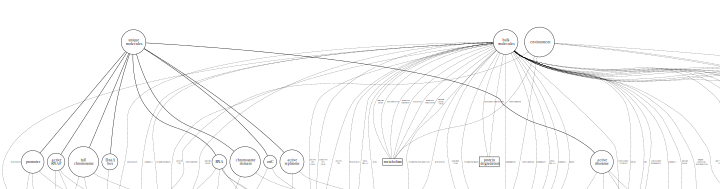

In [19]:
# del ecoli['metabolism']['inputs']['amino<br/>acids']
# del ecoli['metabolism']['inputs']['amino<br/>acids<br/>total']
# del ecoli['metabolism']['inputs']['kinetics<br/>enzymes']
# del ecoli['metabolism']['inputs']['kinetics<br/>substrates']

node_groups = [[
        ['unique<br/>molecules',], ['bulk<br/>molecules',], ['environment',],
    ],
]
plot_settings2 = {
    'node_groups': node_groups,
    'remove_process_place_edges': True,
    'aspect_ratio': 'fill',
    'show_port_labels': False,
    # 'aspect_ratio': '0.25',
}
plot_settings['dpi'] = '100'

fig = plot_bigraph(ecoli,
                   **plot_settings,
                   **plot_settings2,
                   size='10,3',
                   filename='ecoli'
                   )

fig2 = plot_bigraph(ecoli,
                    **plot_settings,
                    **plot_settings2,
                    size='5,10',
                    rankdir='RL',
                    filename='ecoliRL',
                    )
fig

## E. coli subsets

Writing out/ecoli_subset1
node ('unique<br/>molecules',) not in graph
Writing out/ecoli_subset2


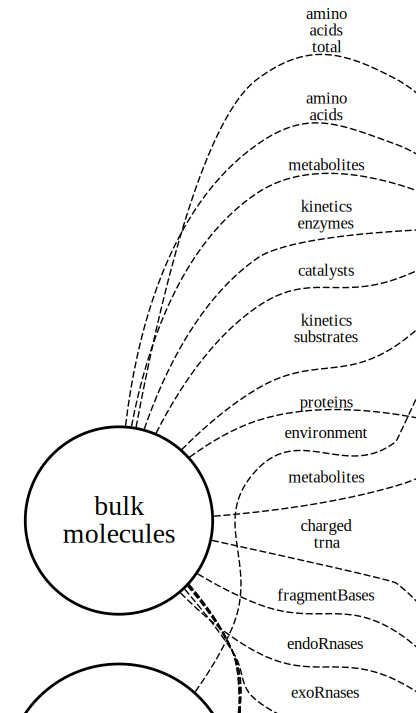

In [20]:
ecoli_subset1 = {
    'chromosome<br/>structure': ecoli['chromosome<br/>structure'],
    # 'metabolism': ecoli['metabolism'],
    # 'tf<br/>binding': ecoli['tf<br/>binding'],
    'transcript<br/>initiation': ecoli['transcript<br/>initiation'],
}

# ecoli subset 2 pulls out only the processes that are connected to bulk, and not to unique
rna_deg = ecoli['rna<br/>degradation'].copy()
del rna_deg['inputs']['RNAs']
del rna_deg['inputs']['active<br/>ribosome']
ecoli_subset2 = {
    'metabolism': ecoli['metabolism'],
    'rna<br/>degradation': rna_deg,
    'protein<br/>degradation': ecoli['protein<br/>degradation'],
}

plot_settings3 = {
    'node_groups': node_groups,
    'remove_process_place_edges': True,
}
plot_bigraph(ecoli_subset1,
             **plot_settings,
             **plot_settings3,
             rankdir='RL',
             filename='ecoli_subset1')
plot_bigraph(ecoli_subset2,
             **plot_settings,
             **plot_settings3,
             rankdir='LR',
             filename='ecoli_subset2')

## E. coli use cases

In [21]:
import copy
ecolin = copy.deepcopy(ecoli)

In [22]:
ecolin.keys()

dict_keys(['chromosome<br/>structure', 'metabolism', 'tf<br/>binding', 'transcript<br/>initiation', 'transcript<br/>elongation', 'rna<br/>degradation', 'polypeptide<br/>initiation', 'polypeptide<br/>elongation', 'complexation', 'two<br/>component<br/>system', 'equilibrium', 'protein<br/>degradation', 'chromosome<br/>replication', 'unique<br/>molecules', 'bulk<br/>molecules', 'environment'])

In [23]:
ecolin['transcript<br/>initiation']

{'_type': 'process',
 'inputs': {'environment': ['environment'],
  'full<br/>chromosomes': ['unique<br/>molecules', 'full<br/>chromosome'],
  'RNAs': ['unique<br/>molecules', 'RNA'],
  'active<br/>RNAPs': ['unique<br/>molecules', 'active<br/>RNAP'],
  'promoters': ['unique<br/>molecules', 'promoter'],
  'molecules': ['bulk<br/>molecules']}}

In [34]:
ecolin['metabolism']['inputs']['environment']

['environment']

## reduced E. coli unknown mechanism

Writing out/ecoli_subsetX


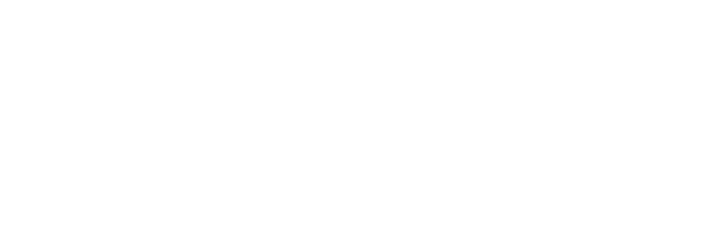

In [58]:
ecolin2 = copy.deepcopy(ecolin)
ecoli_subsetX = {
    'metabolism': ecolin2['metabolism'].copy(),
    'degradation': ecolin2['protein<br/>degradation'].copy(),
    # 'tf<br/>binding': ecolin2['tf<br/>binding'].copy(),
    'transcription': ecolin2['transcript<br/>initiation'].copy(),
    'translation': ecolin2['polypeptide<br/>initiation'].copy(),
    'chromosome<br/>replication': ecolin2['chromosome<br/>replication'].copy(),
    'complexation': ecolin2['complexation'].copy(),
}

# modify
# del ecoli_subsetX['metabolism']['inputs']['environment']
del ecoli_subsetX['metabolism']['inputs']['amino<br/>acids']
del ecoli_subsetX['metabolism']['inputs']['amino<br/>acids<br/>total']
del ecoli_subsetX['metabolism']['inputs']['kinetics<br/>enzymes']
del ecoli_subsetX['metabolism']['inputs']['kinetics<br/>substrates']
# del ecoli_subsetX['transcription']['inputs']['environment']
# del ecoli_subsetX['translation']['inputs']['environment']
del ecoli_subsetX['transcription']['inputs']['promoters']
del ecoli_subsetX['chromosome<br/>replication']['inputs']['full<br/>chromosomes']
del ecoli_subsetX['chromosome<br/>replication']['inputs']['oriCs']

# put environment up one level
ecoli_subsetX['metabolism']['inputs']['environment'] = ['..', 'environment']
ecoli_subsetX['transcription']['inputs']['environment'] = ['..', 'environment']
ecoli_subsetX['translation']['inputs']['environment'] = ['..', 'environment']
ecoli_subsetX['chromosome<br/>replication']['inputs']['environment'] = ['..', 'environment']
# ecoli_subsetX['transcription']['_inputs'] = {'environment': ''}

cell_id = 'microbe'
unknown_func = 'unknown<br/>function'

# add unknown mechanism
ecoli_subsetX[unknown_func] = {
    '_type': 'process',
    '_inputs': {
        'bulk': '',
        'unique': '',
        'environment': '',
        'cell': '',
    },
    'inputs': {
        'bulk': ['bulk<br/>molecules',],
        'unique': ['unique<br/>molecules',],
        'environment': ['..', 'environment',],
        'cell': ['..', cell_id,],
    }
}

# nest under 'cell_id'
ecoli_subsetX1 = {cell_id: ecoli_subsetX}

# settings
node_groupsX = [
    [[cell_id, unknown_func,],['environment',],[cell_id,],],
    [[cell_id, 'unique<br/>molecules',],[cell_id, 'bulk<br/>molecules',],],
    [[cell_id, 'metabolism',],[cell_id, 'transcription',],[cell_id, 'translation',],[cell_id, 'degradation',],],
]
node_border_colors = {
    (cell_id, unknown_func,): 'red',
}
plot_settingsX = {
    'node_groups': node_groupsX,
    'node_border_colors': node_border_colors,
    'remove_process_place_edges': True,
    'size': '10,10',
    'aspect_ratio': 'compress',
    # 'rankdir': 'LR',
}
# plot_settings['dpi'] = '500'
plot_bigraph(ecoli_subsetX1,
             **plot_settings,
             **plot_settingsX,
             filename='ecoli_subsetX')

node ('unique<br/>molecules',) not in graph
node ('bulk<br/>molecules',) not in graph
node ('environment',) not in graph
Writing out/ecoli1
node ('unique<br/>molecules',) not in graph
node ('bulk<br/>molecules',) not in graph
node ('environment',) not in graph
Writing out/ecoli2


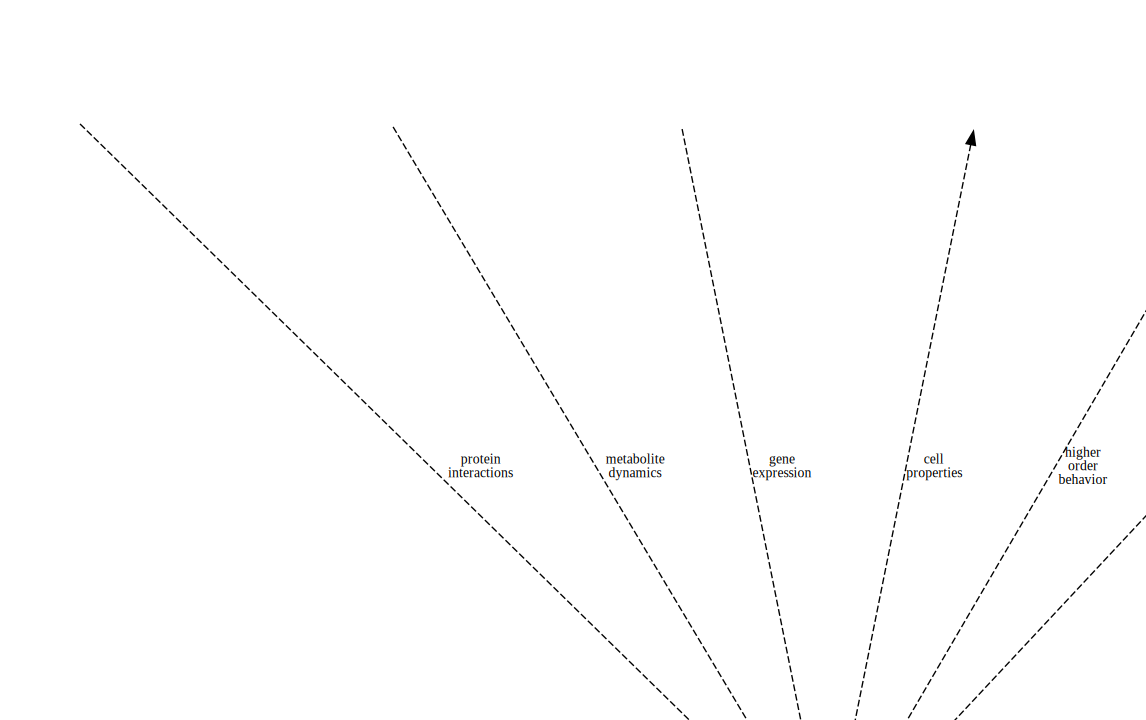

In [59]:
ecoli1 = {
    'biomanufacturing ecoli': {
        '_type': 'process',
        '_inputs': {
            # For gene expression, protein interactions, and metabolite dynamics
            'gene<br/>expression': 'any',
            'protein<br/>interactions': 'any',
            'metabolite<br/>dynamics': 'any',
        },
        '_outputs': {
            #cellular composition, properties such as cell size and growth rate, and higher-order behavior
            'cell<br/>composition': 'any',
            'cell<br/>properties': 'any',
            'higher<br/>order<br/>behavior': 'any',

        }
    }
}
ecoli2 = {
    'antimicrobial efficacy ecoli': {
        '_type': 'process',
        '_inputs': {
            # For gene expression, protein interactions, and metabolite dynamics
            'gene<br/>expression': 'any',
            'protein<br/>interactions': 'any',
            'metabolite<br/>dynamics': 'any',
        },
        '_outputs': {
            #cellular composition, properties such as cell size and growth rate, and higher-order behavior
            'cell<br/>composition': 'any',
            'cell<br/>properties': 'any',
            'higher<br/>order<br/>behavior': 'any',
        }
    }
}


plot_settings2['dpi'] = '100'
plot_bigraph(ecoli1, **plot_settings2, filename='ecoli1')
plot_bigraph(ecoli2, **plot_settings2, filename='ecoli2')

## Antibiotic E. coli COmposite

Writing out/ecoli_antibiotics


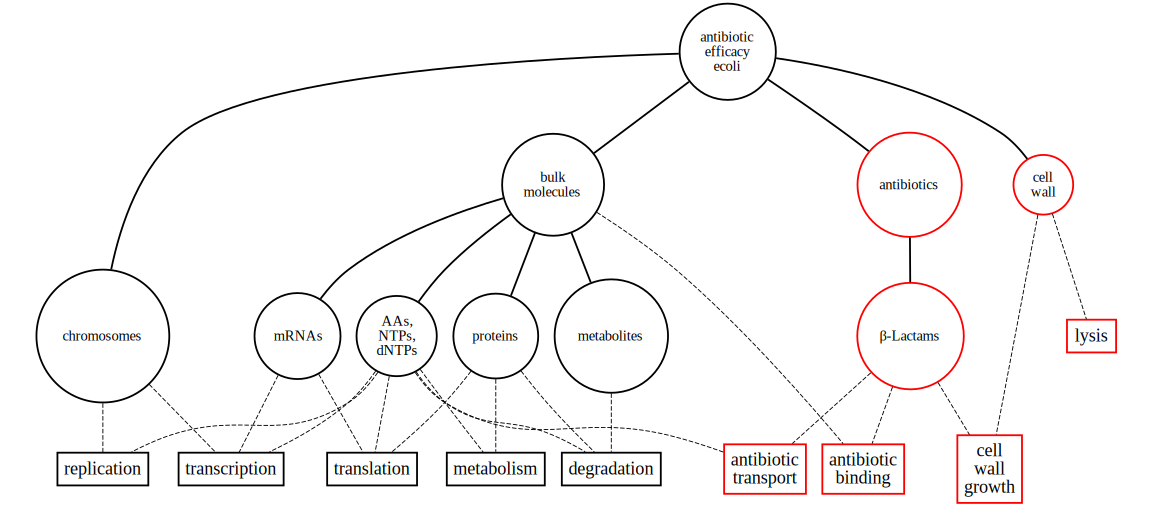

In [60]:
ecoli_antibiotics = {
    'antibiotic<br/>efficacy<br/>ecoli': {
        'replication': {
            '_type': 'process',
            'inputs': {
                'chromosomes': ['chromosomes'],
                'molecules': ['bulk<br/>molecules', 'AAs,<br/>NTPs,<br/>dNTPs',],
            }
        },
        'transcription': {
            '_type': 'process',
            'inputs': {
                'chromosomes': ['chromosomes'],
                'mRNAs': ['bulk<br/>molecules', 'mRNAs'],
                'molecules': ['bulk<br/>molecules', 'AAs,<br/>NTPs,<br/>dNTPs',],
            }
        },
        'degradation': {
            '_type': 'process',
            'inputs': {
                'molecules': ['bulk<br/>molecules', 'AAs,<br/>NTPs,<br/>dNTPs',],
                'metabolites': ['bulk<br/>molecules', 'metabolites'],
                'proteins': ['bulk<br/>molecules', 'proteins'],
            }
        },
        'translation': {
            '_type': 'process',
            'inputs': {
                'mRNAs': ['bulk<br/>molecules', 'mRNAs'],
                'proteins': ['bulk<br/>molecules', 'proteins'],
                'molecules': ['bulk<br/>molecules', 'AAs,<br/>NTPs,<br/>dNTPs',],
            }
        },
        'metabolism': {
            '_type': 'process',
            'inputs': {
                'proteins': ['bulk<br/>molecules', 'proteins'],
                'molecules': ['bulk<br/>molecules', 'AAs,<br/>NTPs,<br/>dNTPs',],
            }
        },
        'antibiotic<br/>transport': {
            '_type': 'process',
            'inputs': {
                'antibiotics': ['antibiotics', 'β-Lactams'],
                'molecules': ['bulk<br/>molecules', 'AAs,<br/>NTPs,<br/>dNTPs',],
            }
        },
        'antibiotic<br/>binding': {
            '_type': 'process',
            'inputs': {
                'antibiotics': ['antibiotics', 'β-Lactams'],
                'molecules': ['bulk<br/>molecules',],
            }
        },
        'cell<br/>wall<br/>growth': {
            '_type': 'process',
            'inputs': {
                'antibiotics': ['antibiotics', 'β-Lactams'],
                'wall': ['cell<br/>wall',],
            }
        },
        'lysis': {
            '_type': 'process',
            'inputs': {
                'wall': ['cell<br/>wall',],
            }
        },
    }
}
plot_settingsx = {
    'node_border_colors': {
        ('antibiotic<br/>efficacy<br/>ecoli', 'cell<br/>wall'): 'red',
        ('antibiotic<br/>efficacy<br/>ecoli', 'antibiotics'): 'red',
        ('antibiotic<br/>efficacy<br/>ecoli', 'antibiotics', 'β-Lactams'): 'red',
        ('antibiotic<br/>efficacy<br/>ecoli', 'antibiotic<br/>transport'): 'red',
        ('antibiotic<br/>efficacy<br/>ecoli', 'antibiotic<br/>binding'): 'red',
        ('antibiotic<br/>efficacy<br/>ecoli', 'cell<br/>wall<br/>growth'): 'red',
        ('antibiotic<br/>efficacy<br/>ecoli', 'lysis'): 'red',
    },
    'port_label_size': '12pt',
    'node_label_size': '16pt',
    'process_label_size': '20pt',
    'label_margin': '0.1',
    'undirected_edges': True,
    'remove_process_place_edges': True,
    # 'aspect_ratio': 'fill',
    'port_labels': False,
    'out_dir': 'out',
    'file_format': 'png',
    # 'dpi': '2000',
}
    # plot_settings['out_dir'] = 'out'
    # plot_settings['file_format'] = 'png'
    # plot_settings['dpi'] = '5000'
plot_bigraph(ecoli_antibiotics, **plot_settingsx, filename='ecoli_antibiotics')

## E. coli colony

### E. coli colony

Writing out/ecoli_colony


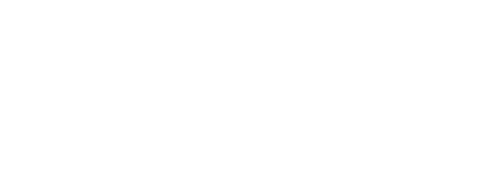

In [61]:
ecoli_schema = {
    '_type': 'process',
    'inputs': {'uptake': ['..', 'fields'],}}
n_ecoli = 6

ecoli_env = {
    # 'environment': {
        'cells': {
            f'ecoli{n}': ecoli_schema for n in range(1, n_ecoli)
        },
        'fields': {},
        'diffusion': {
            '_type': 'process',
            'inputs': {
                '': ['fields',]
            }
        },
        'mother<br/>machine': {
            '_type': 'process',
            'inputs': {
                '': ['cells',]
            }
        }
    # }
}

plot_settings3 = {
    'rankdir': 'TB',
    'port_labels': False,
    'size': '10,10',
    'node_groups': [
        [['diffusion',], ['mother<br/>machine',], ['cells',], ['fields',],],
        # [['environment', 'diffusion',], ['environment', 'mother<br/>machine',], ['environment', 'cells',], ['environment', 'fields',],],
    ],
}
# ecoli_env = replace_regex_recursive[ecoli_env]
plot_bigraph(ecoli_env,
             **plot_settings,
             **plot_settings3,
             filename='ecoli_colony')

## E. coli with ML components

Writing out/ml_ecoli


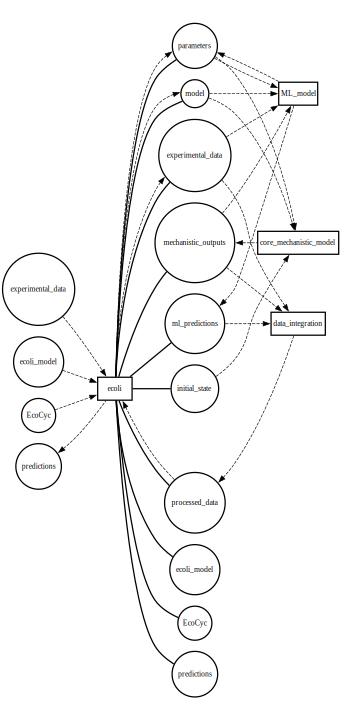

In [62]:
hybrid_ecoli = {
    'ML_model': {
        '_type': 'process',
        'inputs': {
            'training_data': ['experimental_data'],  # Experimental or simulated data for training
            'model_checkpoint': ['model'],  # Saved model state for inference or fine-tuning
            'hyperparameters': ['parameters'],  # Learning rate, architecture, etc.
            'mechanistic_predictions': ['mechanistic_outputs'],  # Feedback from mechanistic model
        },
        'outputs': {
            'learned_parameters': ['parameters'],  # Tuned parameters for mechanistic model
            'predictions': ['ml_predictions'],  # Forecasted states or outputs
            # 'uncertainty_estimates': ['ml_uncertainty'],  # Confidence in predictions
        }
    },
    'core_mechanistic_model': {
        '_type': 'process',
        'inputs': {
            'model': ['model'],  # Saved model state for inference or fine-tuning
            'initial_conditions': ['initial_state'],  # Initial biochemical states
            'parameters': ['parameters'],  # Updated parameters from ML module
        },
        'outputs': {
            'simulation_results': ['mechanistic_outputs'],  # Time-series of biochemical states
        }
    },
    'data_integration': {
        '_type': 'process',
        'inputs': {
            'experimental_data': ['experimental_data'],  # Direct observations from experiments
            'simulation_results': ['mechanistic_outputs'],  # Mechanistic model outputs
            'ml_predictions': ['ml_predictions'],  # ML-generated outputs
        },
        'outputs': {
            'processed_data': ['processed_data'],  # Cleaned and formatted dataset
            # 'performance_metrics': ['evaluation'],  # Model performance comparison
        }
    }
}

composite_ecoli = {
    'ecoli': {
        '_type': 'composite',
        **hybrid_ecoli,
        'inputs': {
            'experimental_data': ['experimental_data'],
            'model': ['ecoli_model'],
            'parameters': ['EcoCyc'],
        },
        'outputs': {
            'predictions': ['predictions'],
        },
        'bridge': {
            'inputs': {
                'experimental_data': ['experimental_data'],
                'model': ['model'],
                'parameters': ['parameters'],
            },
            'outputs': {
                'predictions': ['processed_data'],
            }
        },
    }
}



plot_settings4 = {
    'rankdir': 'LR',
    'port_labels': False,
    'remove_process_place_edges': True,
}
plot_bigraph(composite_ecoli,
             # **plot_settings,
             **plot_settings4,
             filename='ml_ecoli')

Writing out/comp


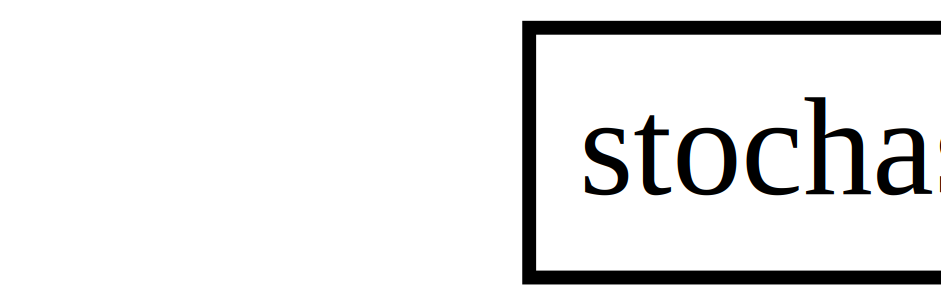

In [63]:
comp = {
    'stochastic transcription': {
        '_type': 'process',
        'inputs': {
            'DNA': ['DNA [counts]'],
            'RNA': ['RNA [counts]'],
        }
    },
    'counts to mg/mL': {
        '_type': 'process',
        'inputs': {
            'RNA_counts': ['RNA [counts]'],
            'RNA_concs': ['RNA [mg/mL]'],
            'volume': ['volume'],
        }
    },
    'deterministic translation': {
        '_type': 'process',
        'inputs': {
            'RNA': ['RNA [mg/mL]'],
            'Protein': ['Protein [mg/mL]'],
        }
    },
    'DNA [counts]': {},
    'RNA [counts]': {},
    'RNA [mg/mL]': {},
    'Protein [mg/mL]': {},
    'volume': {},
}

plot_settings3 = {
    **plot_settings,
    'remove_process_place_edges': True,
    'rankdir': 'BT',
    'port_labels': False,
}
plot_bigraph(comp, **plot_settings3, filename='comp')


Writing out/comp_nested1


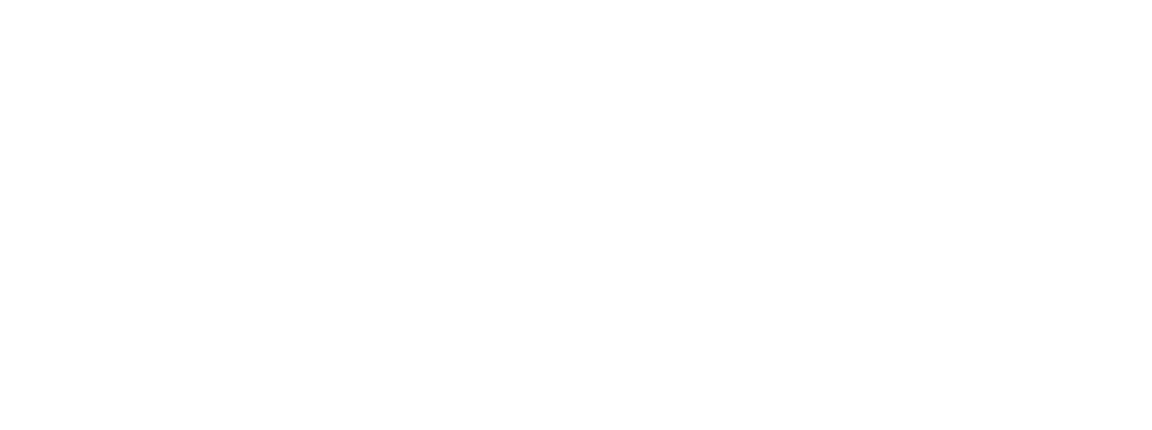

In [64]:
comp_div = {
    'division': {
        '_type': 'process',
        'inputs': {
            'volume': ['volume'],
            'divide': ['..', '..', 'cells'],
        }
    },
    **comp
}

env = {
    'fields': {},
    'dimensions': {},
    'multibody': {
        '_type': 'process',
        'inputs': {
            'cells': ['cells']
        }
    },
    'diffusion': {
        '_type': 'process',
        'inputs': {
            'cells': ['cells'],
            'fields': ['fields'],
            'dimensions': ['dimensions']
        }
    }
}

comp_nested = {
    'cells': {
        '0': comp_div
    },
    **env
}
plot_settings3 = {
    **plot_settings,
    'remove_process_place_edges': True,
    'port_labels': False,
}
plot_bigraph(comp_nested, **plot_settings3, filename='comp_nested1')

Writing out/comp_nested2


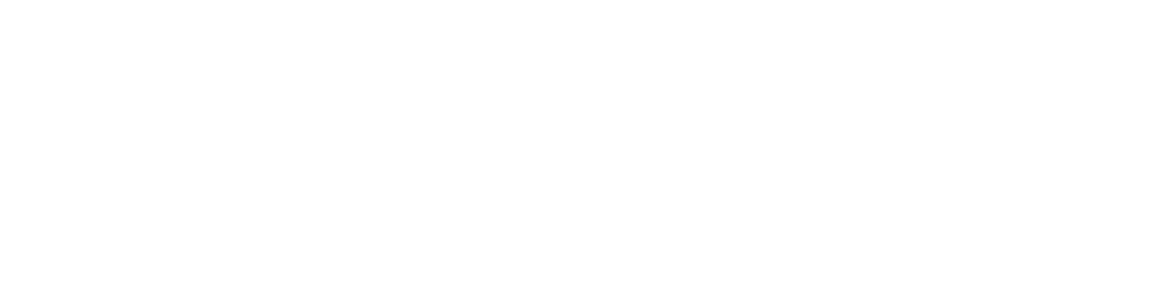

In [65]:
comp_nested = {
    'cells': {
        '1': comp_div,
        '2': comp_div,
    },
    **env
}
plot_bigraph(comp_nested, **plot_settings3, filename='comp_nested2')

Writing out/cell_composite


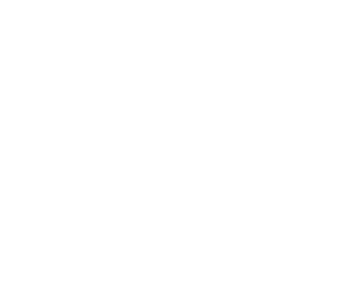

In [66]:
# state
cell_struct_state = {
    'cell<br/>composite': {
        'membrane': {
            'lipids': {},
            'mechanistic<br/>transmembrane<br/>transport': {
                '_type': 'process',
                '_outputs': {
                    'external': 'array'
                },
                'outputs': {
                    'transporters': ['transporters'],
                    'internal': ['..', 'cytoplasm', 'metabolites']
                }
            }
        },
        'cytoplasm': {
            'mechanistic<br/>translation': {
                '_type': 'process',
                'outputs': {
                    'p1': ['ribosomal<br/>complexes'],
                    'p2': ['transcript<br/>regulation<br/>complex', 'transcripts']
                }
            }
        },
        'nucleoid': {
            'chromosome': {
                'genes': {}
            },
            'ML-based<br/>transcription': {
                '_type': 'process',
                'inputs': {
                    'genes': ['chromosome', 'genes']
                },
                'outputs': {
                    'transcripts': ['..', 'cytoplasm', 'transcript<br/>regulation<br/>complex', 'transcripts']
                }
            }
        }
    }
}
population = {
    'population': {
        **cell_struct_state,
        'cell2': {},
        'cell3': {},
        'cell4': {},
        '...': {},
    }
}

plot_bigraph(
    population,
    dpi='1000',
    size='5,4',
    aspect_ratio='fill',
    label_margin='0.02',
    node_border_colors={
        ('population', 'cell<br/>composite', 'membrane', 'mechanistic<br/>transmembrane<br/>transport'): 'blue',
        ('population','cell<br/>composite', 'cytoplasm', 'mechanistic<br/>translation'): 'blue',
        ('population','cell<br/>composite', 'nucleoid', 'ML-based<br/>transcription'): 'red',
    },
    # schema={'cell<br/>composite': 'cell'},
    # core=core,
    port_labels=False,
    remove_process_place_edges=True,
    out_dir='out',
    filename='cell_composite')